In [1]:
!nvidia-smi

Mon Aug 26 03:27:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.146.02             Driver Version: 535.146.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        On  | 00000000:04:00.0 Off |                  N/A |
|  0%   33C    P8              13W / 170W |      0MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /workspace


In [3]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/workspace
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 463 (delta 170), reused 146 (delta 131), pack-reused 231 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 15.38 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/workspace/GroundingDINO


In [4]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/workspace
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ytxpi210
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ytxpi210
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=8ab25f34da29085f27bd44e4b9d039fc1783dabe5754a8ed9d9ae3d8dec8cf11
  Stored in directory: /tmp/pip-ephem-wheel-cache-2fefx_ge/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [9]:
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 6.9 MB/s eta 0:00:0000:0100:01m


In [10]:
!pip uninstall -y supervision
!pip install -q supervision==0.4.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
0.4.0


In [11]:
!pip install -q roboflow

In [12]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/workspace/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [13]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/workspace
/workspace/weights


In [14]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/workspace/weights/groundingdino_swint_ogc.pth ; exist: True


In [15]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/workspace
/workspace/weights


In [16]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/workspace/weights/sam_vit_h_4b8939.pth ; exist: True


In [18]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/workspace/GroundingDINO


/opt/conda/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1704987394225/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [20]:
SAM_ENCODER_VERSION = "vit_h"

In [21]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

In [22]:
f"{HOME}/data"

'/workspace/data'

In [23]:
SOURCE_IMAGE_PATH = f"{HOME}/data/1.jpg"
CLASSES = ["boat", "person", "oars", "trees", "birds", "swans", "cattails", "water", "hills", "clouds", "sun"]
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [24]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

In [25]:
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:1126: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [26]:
detections

Detections(xyxy=array([[ 425.60696 ,  567.2719  ,  751.3329  ,  752.623   ],
       [ 249.38802 ,   92.85245 ,  587.0844  ,  518.244   ],
       [1283.9357  ,  553.00415 , 1511.039   ,  705.4181  ],
       [ 203.77306 ,  697.0306  ,  416.0575  ,  865.58234 ],
       [1106.4456  ,   93.77785 , 1433.5671  ,  499.6286  ],
       [ 299.02423 ,  532.3852  ,  447.33258 ,  642.8995  ],
       [ 434.53598 ,  761.088   ,  687.8608  ,  939.6637  ],
       [  71.45284 ,  551.02014 ,  275.83734 ,  699.01526 ],
       [ 681.54346 ,  572.4859  , 1016.8312  ,  864.76556 ],
       [ 926.2596  ,  542.719   , 1290.2065  ,  744.2229  ],
       [ 169.45612 ,  247.92911 ,  262.47324 ,  478.01266 ],
       [  18.804764,  692.4169  ,  273.10626 ,  984.4602  ],
       [ 682.05835 ,  365.37817 , 1016.1421  ,  863.60474 ],
       [1342.7726  ,  369.7884  , 1506.5123  ,  545.3078  ],
       [ 684.3799  ,  363.77222 , 1012.95056 ,  860.19495 ],
       [ 659.58014 ,  141.45242 ,  802.4511  ,  248.47437 ],
       [

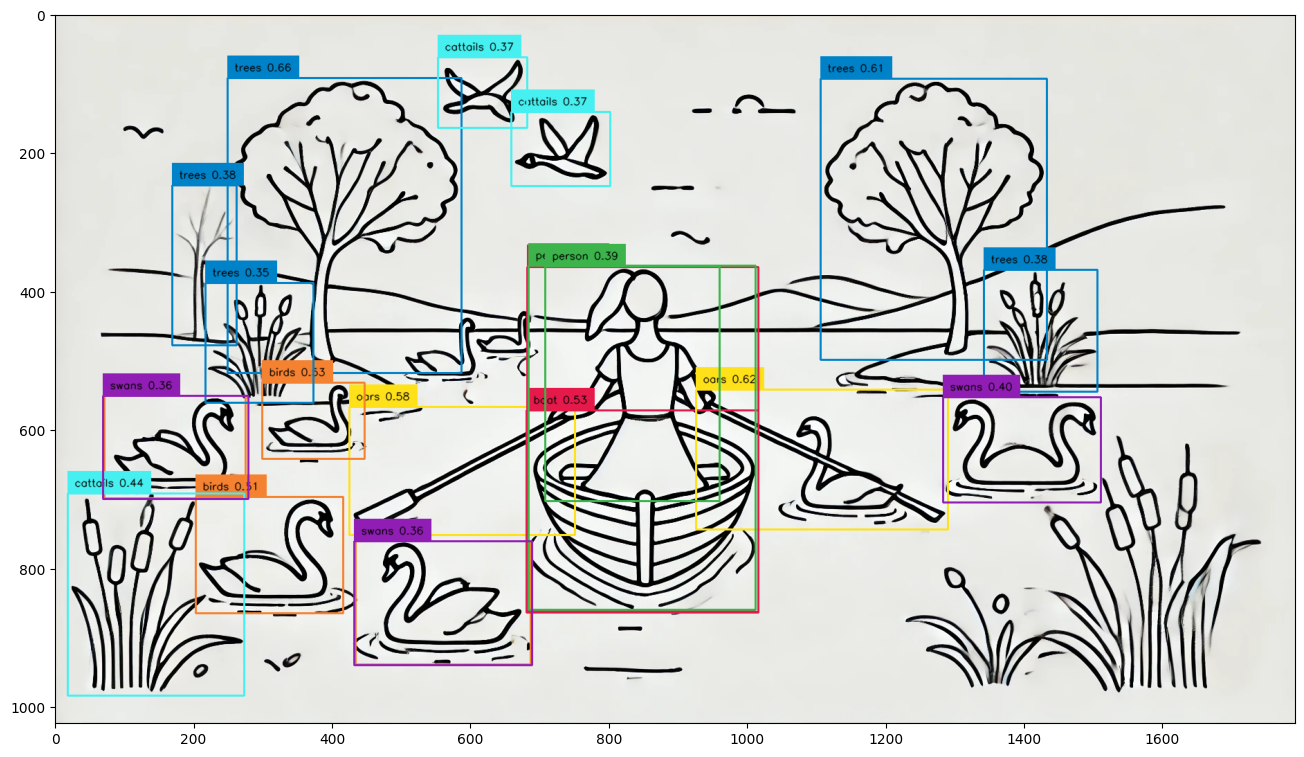

In [31]:
# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for i, (class_id, confidence)
    in enumerate(zip(detections.class_id, detections.confidence))]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [32]:
import numpy as np
from segment_anything import SamPredictor


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

In [34]:
MASK_SAVE_PATH = f"{HOME}/individual_masks"

In [36]:
# Generate masks using SAM
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

In [37]:
# Process and save each detection mask individually
for i, (detection_mask, xyxy, confidence, class_id) in enumerate(zip(detections.mask, detections.xyxy, detections.confidence, detections.class_id)):
    # Ensure the mask is binary (0 or 1)
    binary_mask = detection_mask.astype(np.uint8)

    # Create a visualizable mask (0 or 255)
    visual_mask = binary_mask * 255

    # Get the class name
    class_name = CLASSES[class_id]

    # Save the binary mask
    cv2.imwrite(f"{MASK_SAVE_PATH}/binary_mask_{i}_{class_name}.png", binary_mask * 255)

    # Save the visual mask
    cv2.imwrite(f"{MASK_SAVE_PATH}/visual_mask_{i}_{class_name}.png", visual_mask)

    print(f"Saved mask for object {i}: class={class_name}, confidence={confidence:.2f}")

Saved mask for object 0: class=oars, confidence=0.58
Saved mask for object 1: class=trees, confidence=0.66
Saved mask for object 2: class=birds, confidence=0.55
Saved mask for object 3: class=birds, confidence=0.51
Saved mask for object 4: class=trees, confidence=0.61
Saved mask for object 5: class=birds, confidence=0.53
Saved mask for object 6: class=birds, confidence=0.50
Saved mask for object 7: class=birds, confidence=0.52
Saved mask for object 8: class=boat, confidence=0.53
Saved mask for object 9: class=oars, confidence=0.62
Saved mask for object 10: class=trees, confidence=0.38
Saved mask for object 11: class=cattails, confidence=0.44
Saved mask for object 12: class=boat, confidence=0.42
Saved mask for object 13: class=trees, confidence=0.38
Saved mask for object 14: class=person, confidence=0.36
Saved mask for object 15: class=cattails, confidence=0.37
Saved mask for object 16: class=cattails, confidence=0.37
Saved mask for object 17: class=trees, confidence=0.35
Saved mask for

In [39]:
# Create a combined mask with boundaries between connected objects
combined_mask = np.zeros(image.shape[:2], dtype=np.uint8)
for i, detection_mask in enumerate(detections.mask):
    # Dilate the current mask
    kernel = np.ones((3, 3), np.uint8)
    dilated_mask = cv2.dilate(detection_mask.astype(np.uint8), kernel, iterations=1)

    # Subtract the original mask from the dilated mask to get the boundary
    boundary = dilated_mask - detection_mask.astype(np.uint8)

    # Update the combined mask:
    # 1. Add the current mask
    # 2. Subtract the boundary where it overlaps with existing objects
    combined_mask = np.maximum(combined_mask, detection_mask.astype(np.uint8)) - np.minimum(boundary, combined_mask)

# Save the combined mask
cv2.imwrite(f"{MASK_SAVE_PATH}/combined_mask_with_boundaries.png", combined_mask * 255)
print("Saved combined mask with boundaries between connected objects")

Saved combined mask with boundaries between connected objects


In [41]:
import math

grid_size_dimension = math.ceil(math.sqrt(len(detections.mask)))

titles = [
    CLASSES[class_id]
    for class_id
    in detections.class_id
]

In [45]:
visual_masks = [mask.astype(np.uint8) * 255 for mask in detections.mask ]

In [ ]:
visual_masks

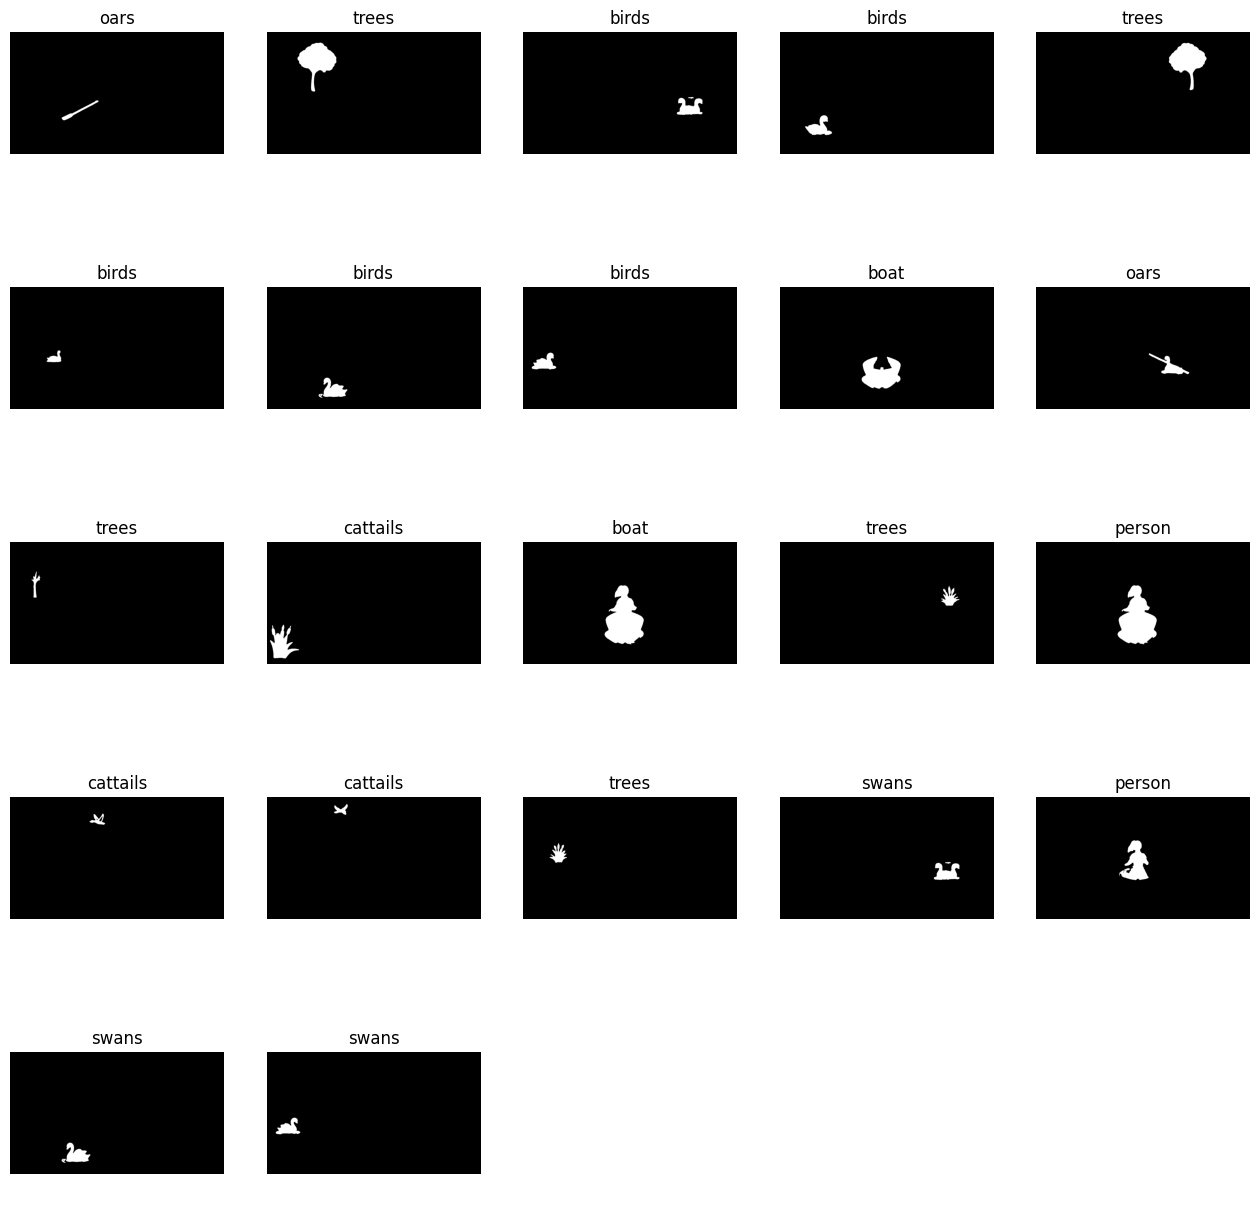

In [47]:
sv.plot_images_grid(
    images=visual_masks,
    titles=titles,
    grid_size=(grid_size_dimension, grid_size_dimension),
    size=(16, 16)
)